#Read the File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/content/online_retail.xlsx")
df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        541909 non-null  int64         
 1   InvoiceNo    541909 non-null  object        
 2   StockCode    541909 non-null  object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 37.2+ MB


In [4]:
df.nunique()

,0
index,541909
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


In [5]:
df.isnull().sum()

,0
index,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [6]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#Descriptive Statistics

In [7]:
df.describe()

,index,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00000,541909.000000,541909,541909.000000,406829.000000
mean,270954.00000,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,0.00000,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,135477.00000,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,270954.00000,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,406431.00000,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,541908.00000,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,156435.79785,218.081158,NaN,96.759853,1713.600303


In [8]:
unique_values = df["Description"].unique()
print(unique_values)

['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']


In [9]:
value_counts = df["Description"].value_counts()
print(value_counts)

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64


Handling Missing Values

In [10]:
df.dropna()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [11]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
# Remove rows with negative quantities (assumed to be returns)
df = df[df['Quantity'] > 0]

In [13]:
df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [14]:
# Create TotalSales column
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Summary statistics
print(df.describe())

               index       Quantity                    InvoiceDate  \
count  531285.000000  531285.000000                         531285   
mean   271254.175629      10.655262  2011-07-04 18:15:45.816539136   
min         0.000000       1.000000            2010-12-01 08:26:00   
25%    135570.000000       1.000000            2011-03-28 11:59:00   
50%    271427.000000       3.000000            2011-07-20 12:01:00   
75%    407072.000000      10.000000            2011-10-19 12:35:00   
max    541908.000000   80995.000000            2011-12-09 12:50:00   
std    156563.184482     156.830323                            NaN   

           UnitPrice     CustomerID    TotalSales  
count  531285.000000  397924.000000  531285.00000  
mean        3.857296   15294.315171      20.03550  
min    -11062.060000   12346.000000  -11062.06000  
25%         1.250000   13969.000000       3.75000  
50%         2.080000   15159.000000       9.90000  
75%         4.130000   16795.000000      17.70000  
max  

<ipython-input-14-4991c9b22800>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSales'] = df['Quantity'] * df['UnitPrice']


In [15]:
df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [16]:
df["Description"].value_counts()

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2327
JUMBO BAG RED RETROSPOT,2115
REGENCY CAKESTAND 3 TIER,2019
PARTY BUNTING,1707
LUNCH BAG RED RETROSPOT,1594
...,...
OOH LA LA DOGS COLLAR,1
MARIE ANTOIENETT TRINKET BOX GOLD,1
GARDENERS KNEELING PAD,1


In [17]:
# Group by product description and calculate total quantity sold for each product
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("The most sold products: ", top_products)

The most sold products:  Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48478
WHITE HANGING HEART T-LIGHT HOLDER    37895
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64


#Data Visualization

##Sales Trend
##Most Product Sold

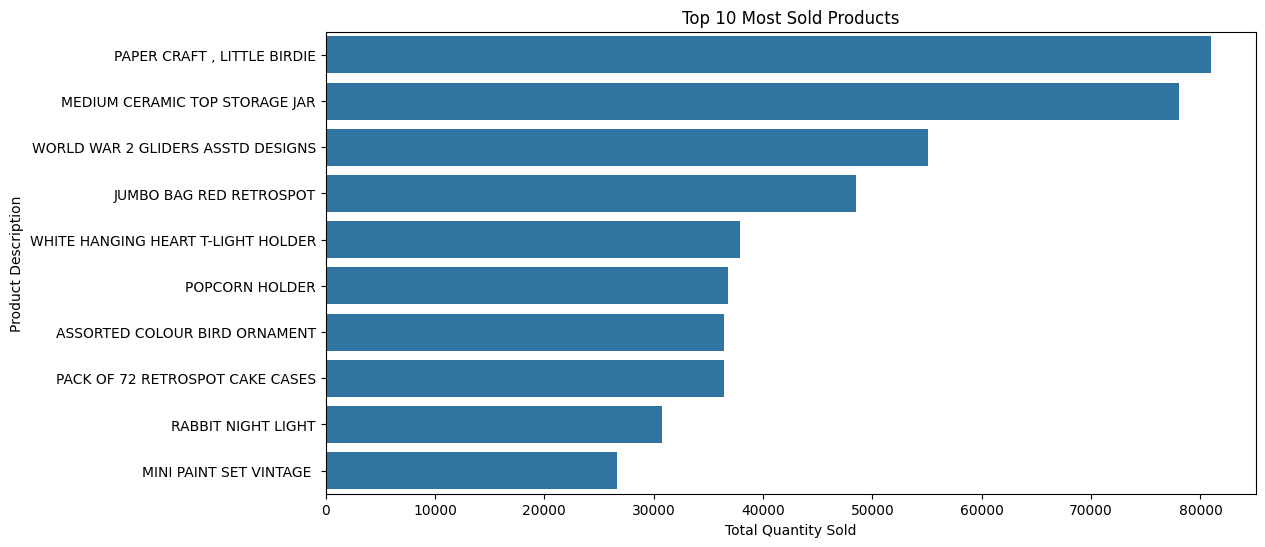

In [18]:
# Plot the top 10 most sold products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Most Sold Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

##Total sales progression in the last 20 days

In [19]:
# Convert InvoiceDate to datetime if it isn't already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Find the minimum and maximum date
min_date = df['InvoiceDate'].min()
max_date = df['InvoiceDate'].max()

print("Date Range:")
print(f"Start Date: {min_date}")
print(f"End Date: {max_date}")


Date Range:
Start Date: 2010-12-01 08:26:00
End Date: 2011-12-09 12:50:00


<ipython-input-19-e583f9a4df15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [20]:
max_date = df['InvoiceDate'].max()

# Calculate the date 20 days before the max date
start_date = max_date - pd.Timedelta(days=20)

# Filter for transactions in the last 20 days
last_20_days_data = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= max_date)]

# Group by date and calculate daily total sales
daily_sales = last_20_days_data.groupby(last_20_days_data['InvoiceDate'].dt.date)['TotalSales'].sum()

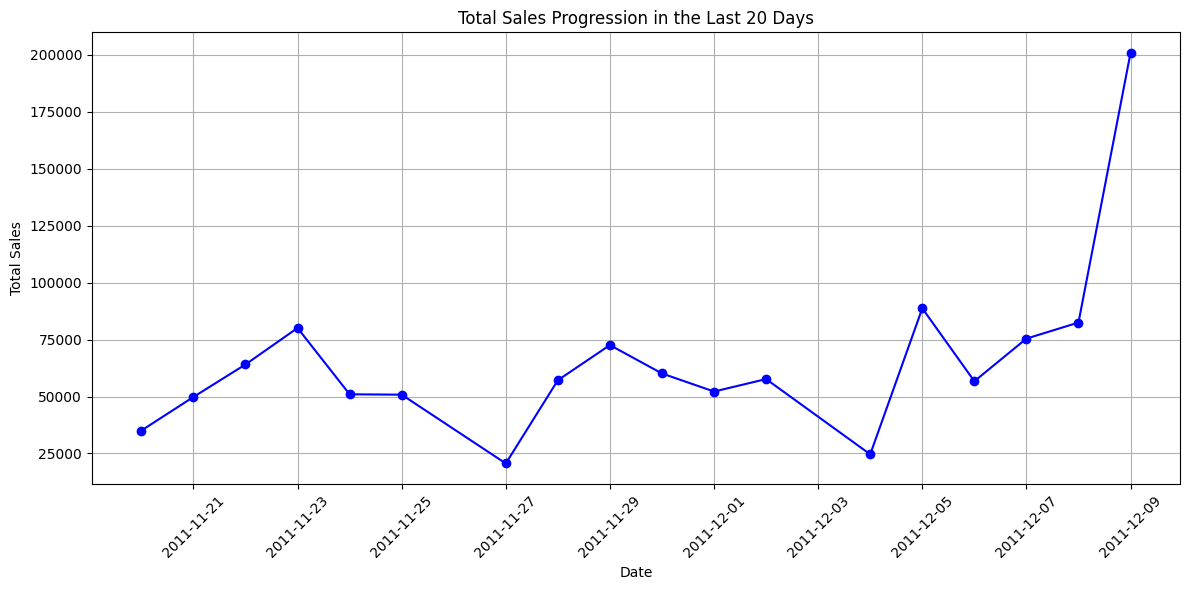

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', color='b')
plt.title('Total Sales Progression in the Last 20 Days')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Filter for transactions in the last 20 days
last_20_days_data = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= max_date)]

# Group by product description and calculate total quantity sold for each product
top_products = last_20_days_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)


<ipython-input-23-56696d9352fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


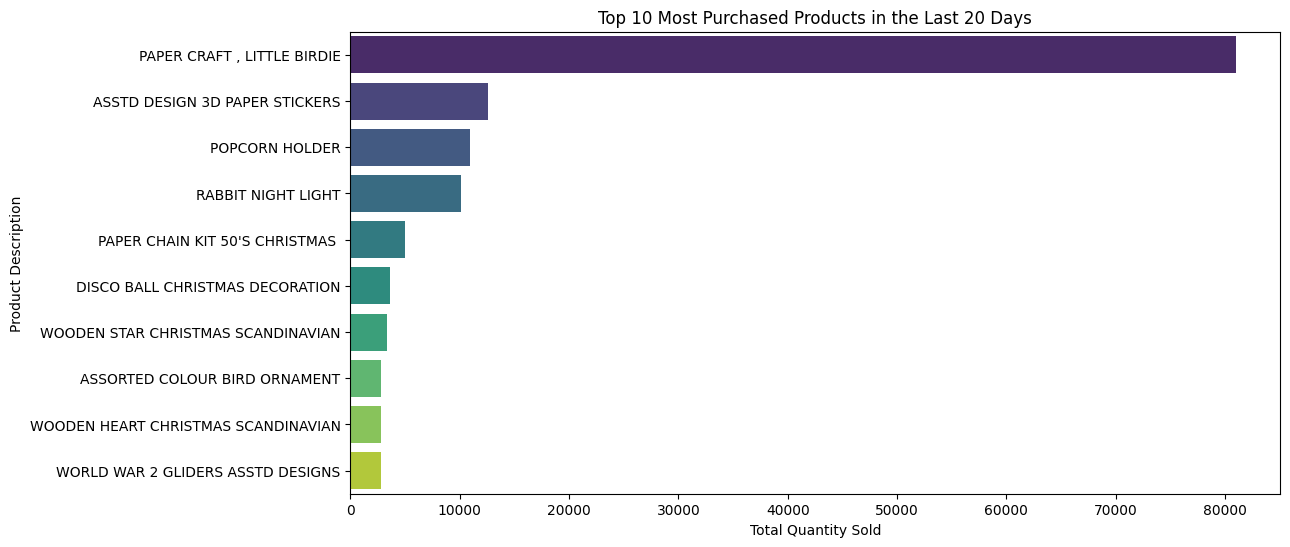

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Most Purchased Products in the Last 20 Days')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

##Month with the highest sales

In [24]:
# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year for trend analysis
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

<ipython-input-24-bd4e35f9947f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-24-bd4e35f9947f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')


<ipython-input-25-1e4023fc4644>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity'] * df['UnitPrice']


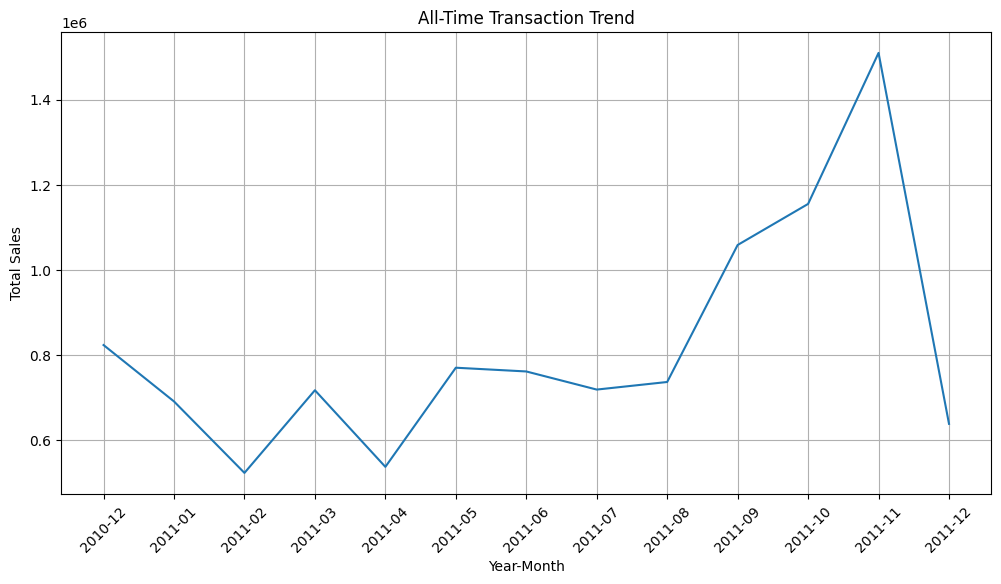

In [25]:
# Group by YearMonth and calculate the total sales
df['Sales'] = df['Quantity'] * df['UnitPrice']
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

# Convert YearMonth to string for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Sales')
plt.title('All-Time Transaction Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [26]:
# Identify the month with the highest sales
highest_sales_month = monthly_sales.loc[monthly_sales['Sales'].idxmax()]
print(f"{highest_sales_month['YearMonth']} with sales of {highest_sales_month['Sales']:.2f}")

2011-11 with sales of 1509496.33


The month with the highest sales is 2011-11 with sales of 1509496.33

##Sales Distribution (country)

In [27]:
# Group by Country and calculate the total sales
country_sales = df.groupby('Country')['Sales'].sum().reset_index()

# Sort the data for better visualization
country_sales = country_sales.sort_values(by='Sales', ascending=False)

<ipython-input-28-da8d0cd7b47d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_sales, x='Sales', y='Country', palette='viridis')


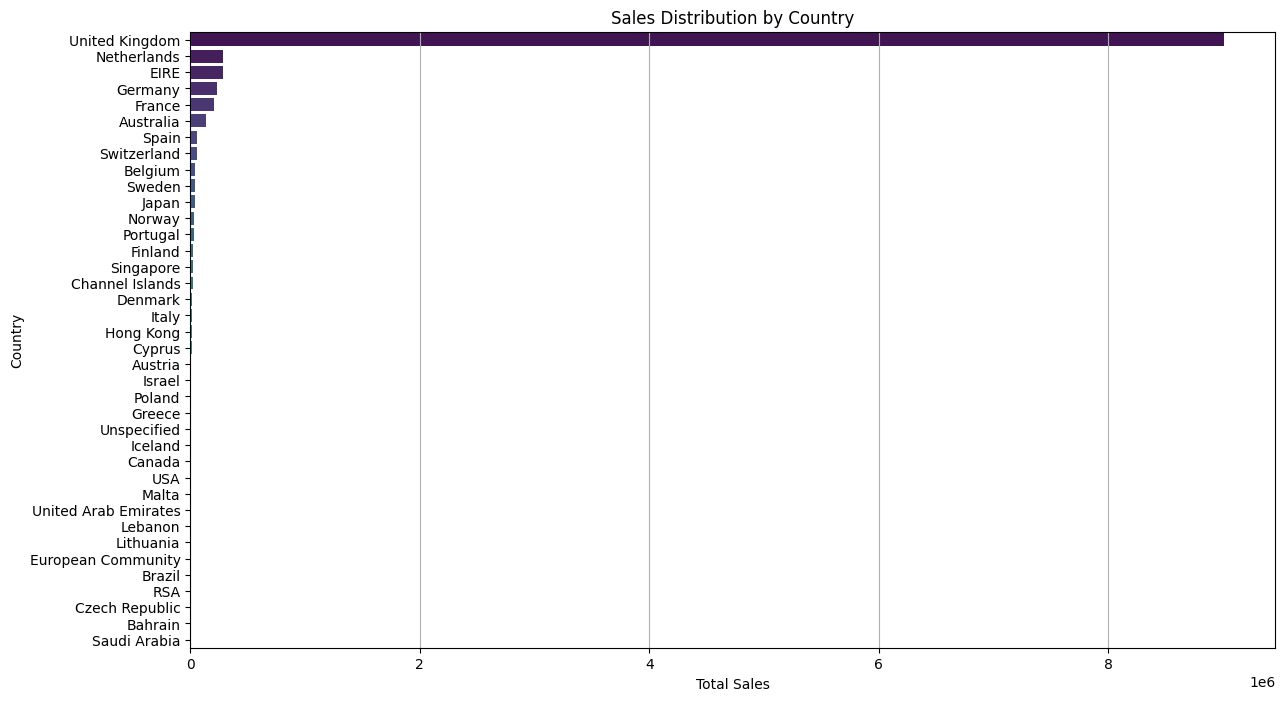

In [28]:
# Plot the sales distribution by country
plt.figure(figsize=(14, 8))
sns.barplot(data=country_sales, x='Sales', y='Country', palette='viridis')
plt.title('Sales Distribution by Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()

In [29]:
country_sales.head(10)

,Country,Sales
36,United Kingdom,9003097.964
24,Netherlands,285446.340
10,EIRE,283453.960
14,Germany,228867.140
13,France,209715.110
0,Australia,138521.310
31,Spain,61577.110
33,Switzerland,57089.900
3,Belgium,41196.340
32,Sweden,38378.330


In [30]:
country_sales.tail(10)

,Country,Sales
23,Malta,2725.59
35,United Arab Emirates,1902.28
21,Lebanon,1693.88
22,Lithuania,1661.06
11,European Community,1300.25
4,Brazil,1143.60
28,RSA,1002.31
8,Czech Republic,826.74
2,Bahrain,754.14
29,Saudi Arabia,145.92


##Sales Distribution (product)

In [31]:
# Group by Country and calculate the total sales
description_sales = df.groupby('Description')['Sales'].sum().reset_index()

# Sort the data for better visualization
description_sales = description_sales.sort_values(by='Sales', ascending=False)

<ipython-input-32-e4e3d1d6e064>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=description_sales, x='Sales', y='Description', palette='viridis')


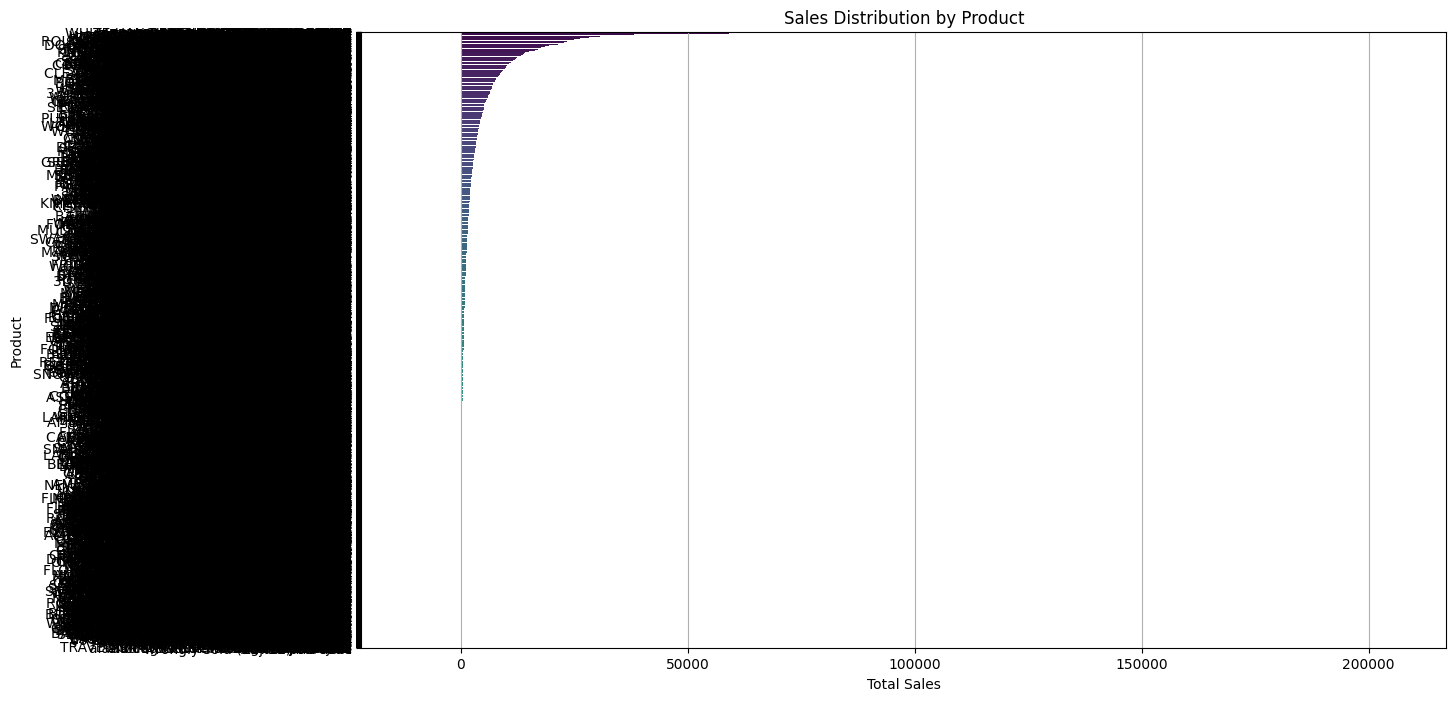

In [32]:
# Plot the sales distribution by product
plt.figure(figsize=(14, 8))
sns.barplot(data=description_sales, x='Sales', y='Description', palette='viridis')
plt.title('Sales Distribution by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.grid(axis='x')
plt.show()

In [33]:
description_sales.head(10)

,Description,Sales
1072,DOTCOM POSTAGE,206248.77
2867,REGENCY CAKESTAND 3 TIER,174484.74
2401,"PAPER CRAFT , LITTLE BIRDIE",168469.60
3860,WHITE HANGING HEART T-LIGHT HOLDER,106292.77
2427,PARTY BUNTING,99504.33
1827,JUMBO BAG RED RETROSPOT,94340.05
2065,MEDIUM CERAMIC TOP STORAGE JAR,81700.92
2205,Manual,78112.82
2706,POSTAGE,78101.88
2755,RABBIT NIGHT LIGHT,66964.99


In [34]:
description_sales.tail(10)

,Description,Sales
267,Amazon,0.00
266,Adjustment,0.00
4042,add stock to allocate online orders,0.00
4043,adjustment,0.00
4044,alan hodge cant mamage this section,0.00
4045,allocate stock for dotcom orders ta,0.00
4046,amazon,0.00
4047,amazon adjust,0.00
4076,wrongly sold (22719) barcode,0.00
265,Adjust bad debt,-11062.06


In [35]:
df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,YearMonth,Sales
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12,10.20
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12,12.60
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,16.60
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,16.60


##Geographic Distribution of Unique Customers

In [36]:
country_distribution = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)# Count unique customers per country

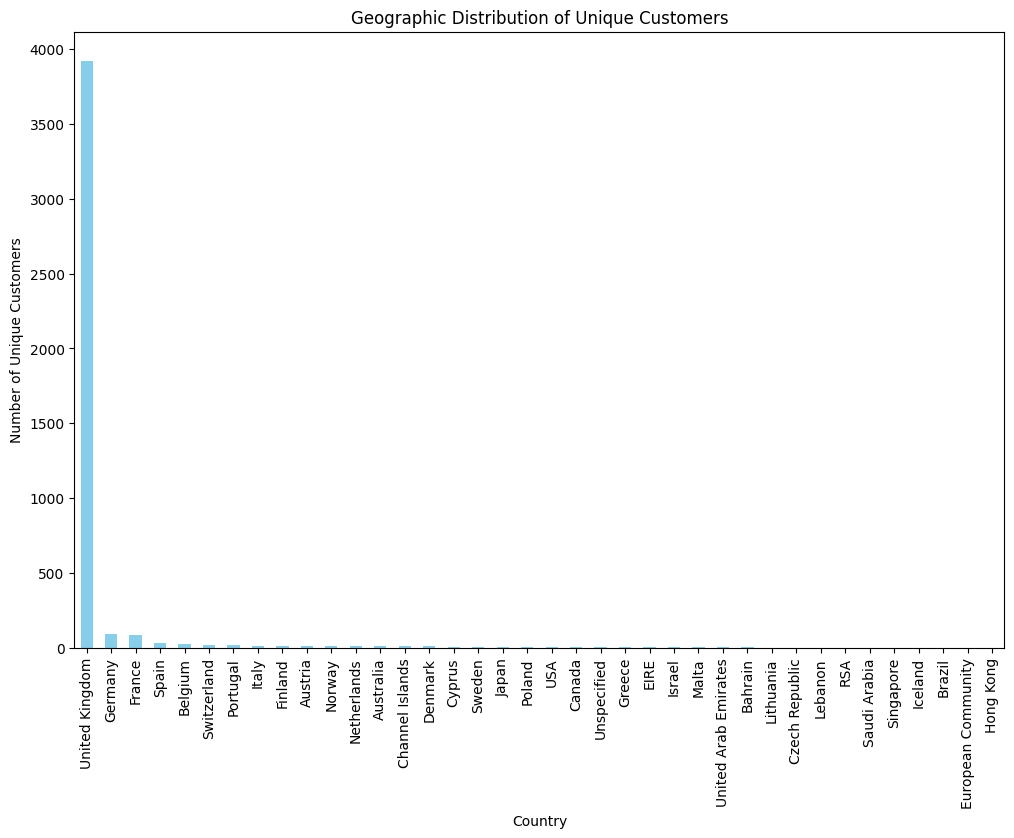

In [37]:
plt.figure(figsize=(12, 8))
country_distribution.plot(kind='bar', color='skyblue')
plt.title('Geographic Distribution of Unique Customers')
plt.xlabel('Country')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)
plt.show()

In [38]:
# Calculate total spending per customer
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
customer_activity = df.groupby('CustomerID').agg({
    'TotalAmount': 'sum',     # Total spending
    'InvoiceNo': 'nunique',   # Number of purchases
    'Quantity': 'sum'         # Total quantity purchased
}).rename(columns={'InvoiceNo': 'PurchaseFrequency', 'Quantity': 'TotalQuantity'})


<ipython-input-38-d2ddc8d72473>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


##Customer Segmentation by Spending

<ipython-input-39-e9a59f5cf3cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
<ipython-input-39-e9a59f5cf3cc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_activity, x='SpendingSegment', palette='viridis')


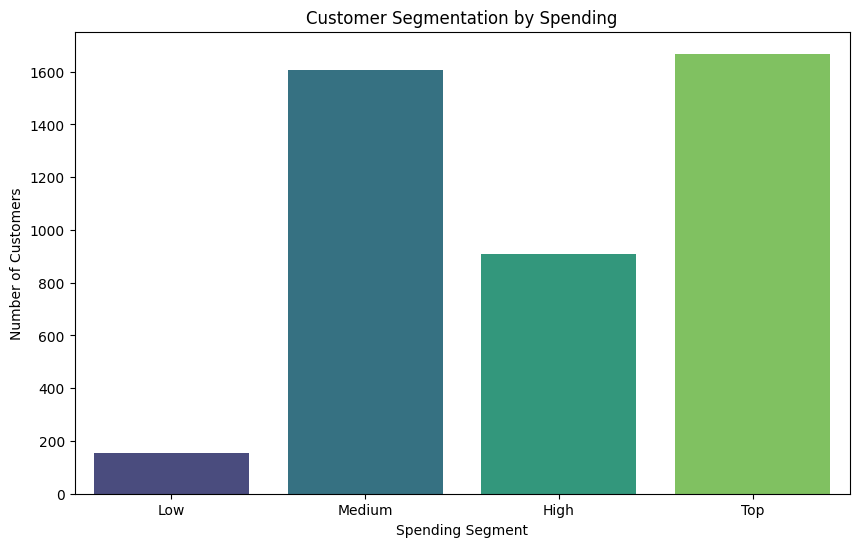

In [39]:
# 2. Customer Segmentation based on Purchase Activity
# Calculate total spending per customer
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
customer_activity = df.groupby('CustomerID').agg({
    'TotalAmount': 'sum',     # Total spending
    'InvoiceNo': 'nunique',   # Number of purchases
    'Quantity': 'sum'         # Total quantity purchased
}).rename(columns={'InvoiceNo': 'PurchaseFrequency', 'Quantity': 'TotalQuantity'})

# Define custom bins for spending and frequency
spending_bins = [0, 100, 500, 1000, customer_activity['TotalAmount'].max()]
frequency_bins = [0, 5, 10, 20, customer_activity['PurchaseFrequency'].max()]

# Apply custom segmentation based on the bins
customer_activity['SpendingSegment'] = pd.cut(customer_activity['TotalAmount'], bins=spending_bins, labels=['Low', 'Medium', 'High', 'Top'])
customer_activity['FrequencySegment'] = pd.cut(customer_activity['PurchaseFrequency'], bins=frequency_bins, labels=['Low', 'Medium', 'High', 'Top'])

# Plot spending segments
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_activity, x='SpendingSegment', palette='viridis')
plt.title('Customer Segmentation by Spending')
plt.xlabel('Spending Segment')
plt.ylabel('Number of Customers')
plt.show()


##Customer Segmentation by Purchase Frequency

<ipython-input-40-19eee35e003d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_activity, x='FrequencySegment', palette='plasma')


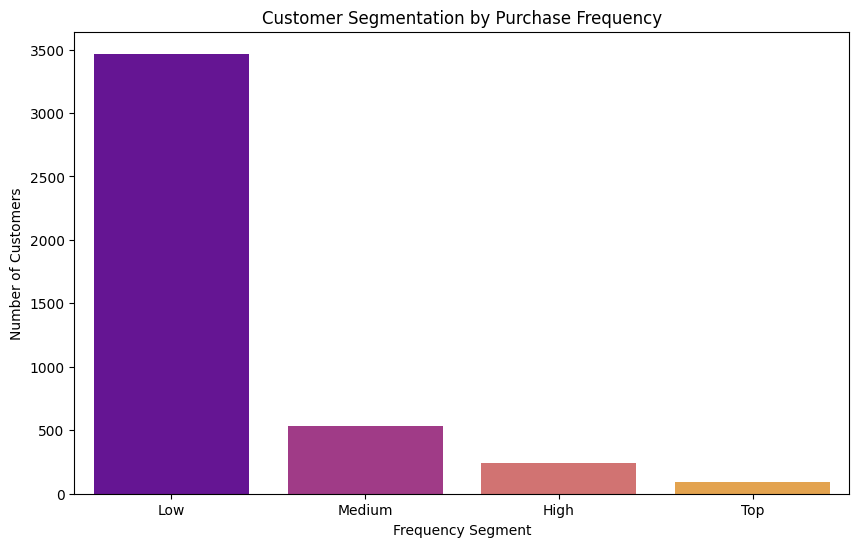

In [40]:
# Plot frequency segments
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_activity, x='FrequencySegment', palette='plasma')
plt.title('Customer Segmentation by Purchase Frequency')
plt.xlabel('Frequency Segment')
plt.ylabel('Number of Customers')
plt.show()


In [41]:
print(customer_activity.head())

            TotalAmount  PurchaseFrequency  TotalQuantity SpendingSegment  \
CustomerID                                                                  
12346.0        77183.60                  1          74215             Top   
12347.0         4310.00                  7           2458             Top   
12348.0         1797.24                  4           2341             Top   
12349.0         1757.55                  1            631             Top   
12350.0          334.40                  1            197          Medium   

           FrequencySegment  
CustomerID                   
12346.0                 Low  
12347.0              Medium  
12348.0                 Low  
12349.0                 Low  
12350.0                 Low  


##Product Sales

In [42]:
# Calculate the total quantity purchased for each product
product_sales = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

most_purchased = product_sales.head(1)
print("Most Purchased Product:")
print(most_purchased)

least_purchased = product_sales.tail(1)
print("\nLeast Purchased Product:")
print(least_purchased)

Most Purchased Product:
Description
PAPER CRAFT , LITTLE BIRDIE    80995
Name: Quantity, dtype: int64

Least Purchased Product:
Description
SET/6 IVORY BIRD T-LIGHT CANDLES    1
Name: Quantity, dtype: int64


Most purchased product : PAPER CRAFT and LITTLE BIRDIE
Quantity : 8095

Least purchased product : SET/6 IVORY BIRD T-LIGHT CANDLES
Quantity : 1 *italicized text*

##Correlation Table

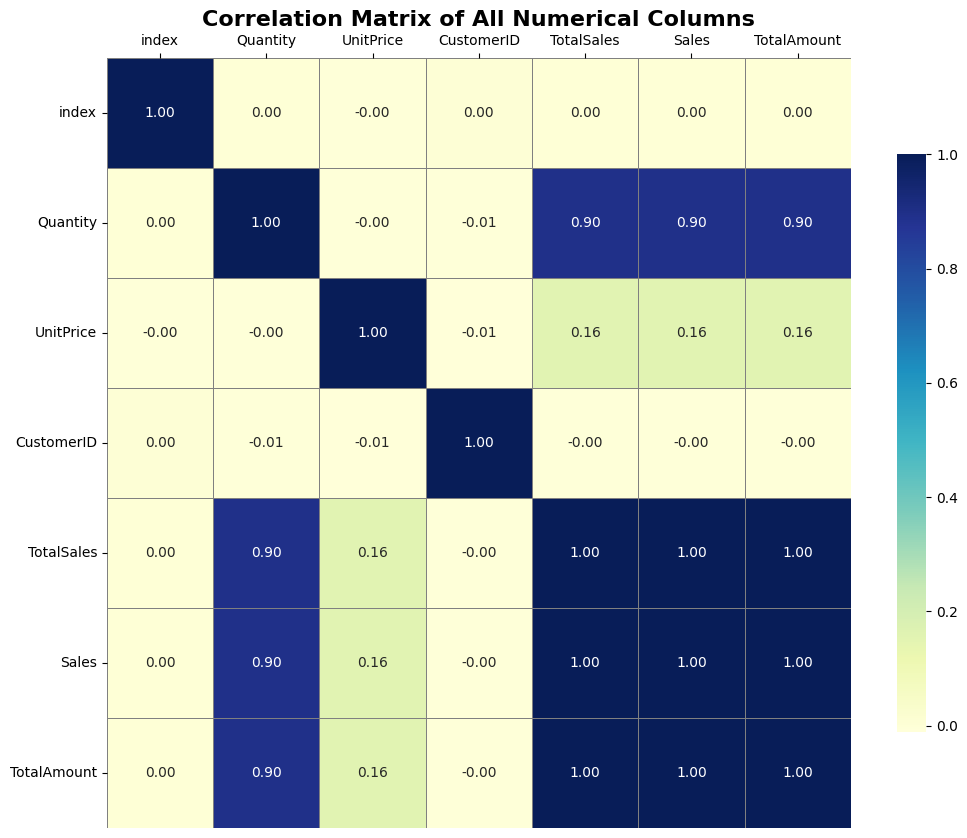

In [43]:
correlation_matrix = df.corr(numeric_only=True)

# Plotting the heatmap with enhanced aesthetics and x-axis labels on top
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='YlGnBu',    # Color palette
            fmt=".2f",        # Decimal format
            linewidths=0.5,   # Cell lines
            linecolor='gray', # Line color
            cbar_kws={"shrink": 0.75})  # Shrink color bar

plt.title("Correlation Matrix of All Numerical Columns", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='left')  # Rotate x-axis labels and align left
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.gca().xaxis.tick_top()           # Move x-axis labels to the top
plt.show()

#Insights



*   The most sold product is Paper Craft, Little Birdie
*   Peak Sales is in Q4, after the peak there is a sharp decline in sales, the drop might be because of the end of the high season
*   The highest sales is from UK (Geographic Sales Distribution)
*   Netherlands, Ireland, Germany shows market potential for expansion
*   The highest sales with the significant revenue : Dotcom Postage
*   Low Purchase Frequency means that the customer don't shop often
*   But from customer segmentation spending shows that when the customer do the purchasing, the amount of money that they spent are considerable amount

#Recommendations



*   Focus on the UK sales
*   Explore Growth in Netherlands, Ireland, Germany
*   Optimize the most sold products
*   Based on the customer segmentation data, engage the Top and Medium spending segments, consider implementing loyalty programs that reward repeat purchases
*   Upsell to Medium Spenders by offer deals or bundles to encourage medium spenders to spend a bit more
*   Give promotions for infrequent shoppers
*   Engage High-Spending Infrequent Buyers by giving them some special offers
*   Investigate what drove the sales peak (example : holiday season)
*   Also we can give promotions when